In [85]:
using Plots

In [86]:
include("nonlinear_growth.jl")

Main.nonlinear_growth

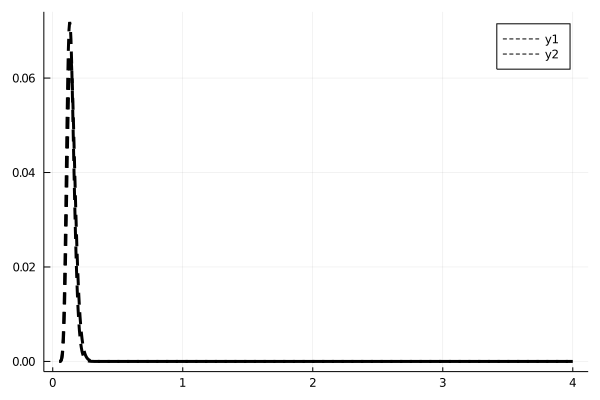

In [92]:
x = 0.05:0.005:4
mu = 0.1
sigma = 0.2
y = nonlinear_growth.logNormal.(x,mu,sigma)
#Plots.plot(log.(x),y./sum(y),color = "black", width = 3)
y = nonlinear_growth.integrated_logNormal_reimann.(x,nonlinear_growth.g,mu,0.1,sigma)
Plots.plot(x,y./sum(y),color = "black", width = 3, linestyle =:dash)
y = nonlinear_growth.aprox_Normal_taylor.(log.(x),log(mu),0.1,sigma,1.5,1)
Plots.plot!(x,y./sum(y),color = "black", width = 3, linestyle =:dash)

In [59]:
mu = sum(log.(x) .*y./sum(y))
sum((log.(x) .- mu).^2 .*y./sum(y))

0.11964696491428911

In [112]:
C1 = (1/(sigma_x^2+sigma_nu^2)+1/sigma_omega^2)^-1*(1/(sigma_x^2+sigma_nu^2))
C2 = (1/(sigma_x^2+sigma_nu^2)+1/sigma_omega^2)^-1*(1/sigma_omega^2)

0.566915270681799

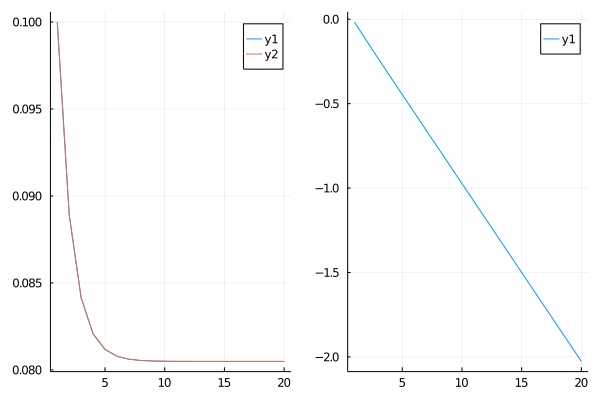

In [212]:
r1,r2 = log(0.9), log(1.0)
x0 = 0
update_mu(mu,t) = C1*(mu + r2) + (1-C1)*(x0+r1*(t+1))
update_chi(chi) = C1*chi + C1*(r2-r1)
N = 20
mu_ls = zeros(N)
chi_ls = zeros(N)
chi2_ls = zeros(N)
mu =  0.1
chi = mu-x0
for t in 0:(N-1)
    chi_ls[t+1] = mu - (x0+r1*(t))
    mu = update_mu(mu,t)
    mu_ls[t+1] = mu
    chi2_ls[t+1] = chi
    chi = update_chi(chi)
    
    
end 
p1 = Plots.plot(chi2_ls)
Plots.plot!(chi_ls)
p2 = Plots.plot(mu_ls)
plot(p1,p2)

In [160]:
1-C2

0.43308472931820097

In [146]:
C1

0.43308472931820097